In [1]:
from pytket.circuit import Circuit, OpType


In [9]:
from pytket import wasm


In [10]:
w = wasm.WasmFileHandler("testfile.wasm")

In [12]:
from pytket._tket.circuit import (  # type: ignore
    _TEMP_BIT_NAME,
    _TEMP_BIT_REG_BASE,
    BitRegister,
    QubitRegister,
    Bit,
    Circuit,
    OpType,
    Qubit,
    Conditional,
    Op,
    SetBitsOp,
    MultiBitOp,
    RangePredicateOp,
    ClassicalExpBox,
)

In [26]:
c = Circuit(4, 4, name="example")
c.add_gate(OpType.CU1, 0.5, [0, 1])
c.H(0).X(1).Y(2).Z(3)
c.add_wasm("add_one", w, [1], [1], [Bit(0), Bit(1)])
c.add_wasm("add_one", w, [1], [1], [Bit(2), Bit(3)])
c.add_wasm("add_one", w, [1], [1], [Bit(0), Bit(3)])
c.add_wasm("add_one", w, [4], [4], [Bit(0), Bit(1),Bit(2),Bit(3),Bit(0), Bit(1),Bit(2),Bit(3)])
c.measure_all()

[WASM c[0], c[1]; WASM c[2], c[3]; CU1(0.5) q[0], q[1]; Y q[2]; Z q[3]; WASM c[0], c[3]; H q[0]; X q[1]; WASM c[0], c[1], c[2], c[3], c[0], c[1], c[2], c[3]; Measure q[0] --> c[0]; Measure q[1] --> c[1]; Measure q[2] --> c[2]; Measure q[3] --> c[3]; ]

In [27]:
from pytket.utils import Graph



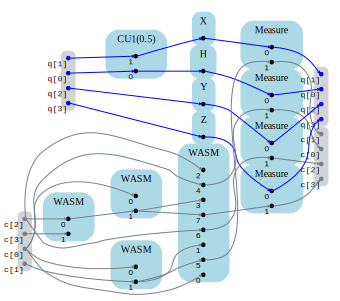

In [28]:
G = Graph(c)
G.get_DAG()
